# LEARN_02_KODILLA_Credit_Card_Defaulter_Prediction


#### The main goal of this project is to analyze the dataset from the KODILLA Credit_Card_Defaulter_Prediction and select a classifier that, after training, will be able to provide the best prediction of credit card fraud.

#### Import of necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, f1_score, roc_auc_score, make_scorer
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

#### Loading data from the file default_of_credit_card_clients.xls

In [2]:
dataframe = pd.read_excel('default_of_credit_card_clients.xls', header=1)
dataframe

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


### VARIABLE DESCRIPTIONS
#### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
#### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
#### X2: Gender (1 = male; 2 = female).
#### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
#### X4: Marital status (1 = married; 2 = single; 3 = others).
#### X5: Age (year).
#### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
#### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
#### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

#### Verification if there are missing data in the dataframe

In [3]:
dataframe.isnull().mean()*100

ID                            0.0
LIMIT_BAL                     0.0
SEX                           0.0
EDUCATION                     0.0
MARRIAGE                      0.0
AGE                           0.0
PAY_0                         0.0
PAY_2                         0.0
PAY_3                         0.0
PAY_4                         0.0
PAY_5                         0.0
PAY_6                         0.0
BILL_AMT1                     0.0
BILL_AMT2                     0.0
BILL_AMT3                     0.0
BILL_AMT4                     0.0
BILL_AMT5                     0.0
BILL_AMT6                     0.0
PAY_AMT1                      0.0
PAY_AMT2                      0.0
PAY_AMT3                      0.0
PAY_AMT4                      0.0
PAY_AMT5                      0.0
PAY_AMT6                      0.0
default payment next month    0.0
dtype: float64

#### Verification if there are duplicates in the dataframe

In [4]:
dataframe.duplicated().any()

False

#### Checking the data type for individual columns

In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

#### Preliminary analysis of individual columns
#### At this stage, we can see that the max and min values for the MARRIAGE column and the EDUCTION column take different values than in the description.

In [6]:
dataframe.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


#### To decide on their further processing, first analyze the label structure
#### Labels for "0" and "1" are not well balanced. "1" constitute only about 22% of all data and this will be one of the main challenges for this classification
#### So we should avoid a situation in which the set of labels "1" would be even more reduced, because the models will need this data to work more efficiently

default payment next month
0    23364
1     6636
Name: count, dtype: int64


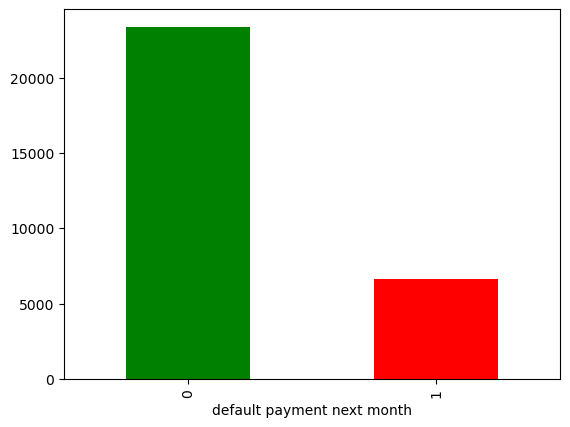

In [7]:
print(dataframe['default payment next month'].value_counts())
CountDefault = pd.Series(dataframe['default payment next month']).value_counts()
CountDefault.plot.bar(color=['green','red'])
plt.show()

#### For the EDUCATION column, 7 groups are visible instead of the defined 4

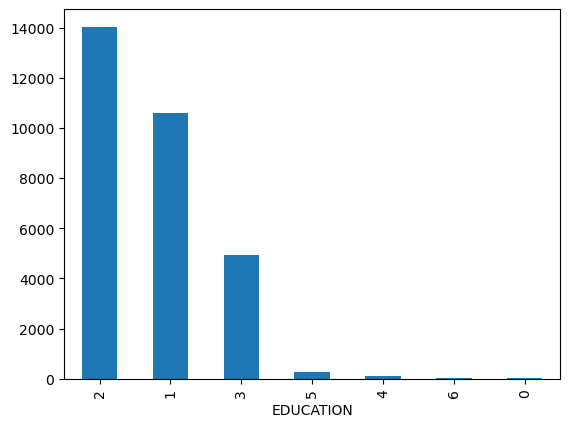

In [8]:
CountEDU = pd.Series(dataframe['EDUCATION']).value_counts()
CountEDU.plot.bar()
plt.show()

#### Thanks to the analysis of the EDUCATION column in terms of the amount of labels 0 and 1, it can be seen that there are labels 1 in additional incorrect groups. Therefore, they will be assigned to the "others" category.

In [9]:
print("All data from Column:", pd.Series(dataframe['EDUCATION']).value_counts())
print("\nOnly labels '0' from from Column:", pd.Series(dataframe[dataframe['default payment next month']==0]['EDUCATION']).value_counts())
print("\nOnly labels '1' from from Column:", pd.Series(dataframe[dataframe['default payment next month']==1]['EDUCATION']).value_counts())

All data from Column: EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64

Only labels '0' from from Column: EDUCATION
2    10700
1     8549
3     3680
5      262
4      116
6       43
0       14
Name: count, dtype: int64

Only labels '1' from from Column: EDUCATION
2    3330
1    2036
3    1237
5      18
6       8
4       7
Name: count, dtype: int64


#### To simplify chart we can use Seaborn to show results in split for defaulers and not defaulters. 

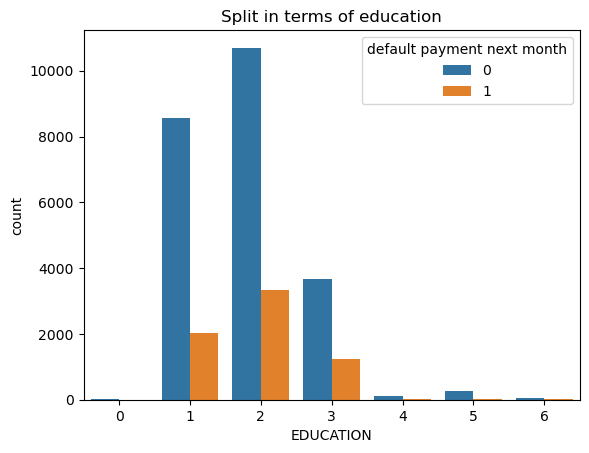

In [10]:
plt.title('Split in terms of education')
sns.countplot(x='EDUCATION', hue='default payment next month', data=dataframe)
plt.show()

#### The situation is similar for the MARRIAGE column, except that we only have one additional category not included in the description. The procedure is analogous to the one above

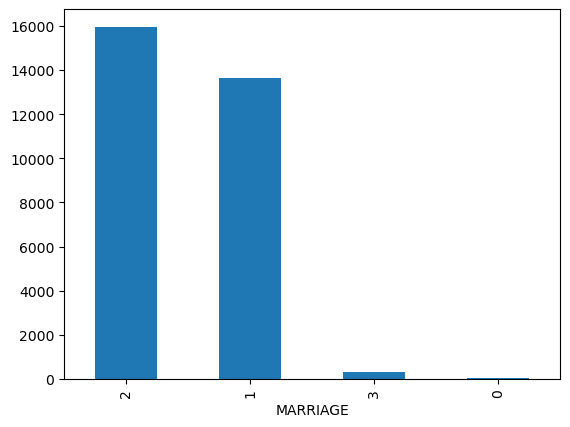

In [11]:
CountMAR = pd.Series(dataframe['MARRIAGE']).value_counts()
CountMAR .plot.bar()
plt.show()

In [12]:
print("All data from Column:", pd.Series(dataframe['MARRIAGE']).value_counts())
print("\nOnly labels '0' from from Column:", pd.Series(dataframe[dataframe['default payment next month']==0]['MARRIAGE']).value_counts())
print("\nOnly labels '1' from from Column:", pd.Series(dataframe[dataframe['default payment next month']==1]['MARRIAGE']).value_counts())

All data from Column: MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64

Only labels '0' from from Column: MARRIAGE
2    12623
1    10453
3      239
0       49
Name: count, dtype: int64

Only labels '1' from from Column: MARRIAGE
2    3341
1    3206
3      84
0       5
Name: count, dtype: int64


#### To simplify chart we can use Seaborn to show results in split for defaulers and not defaulters. 

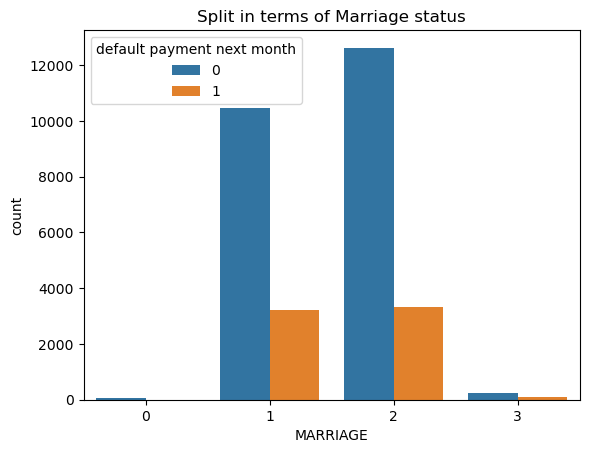

In [13]:
plt.title('Split in terms of Marriage status')
sns.countplot(x='MARRIAGE', hue='default payment next month', data=dataframe)
plt.show()

#### We can also check what is defaulers rate in term of sex. 

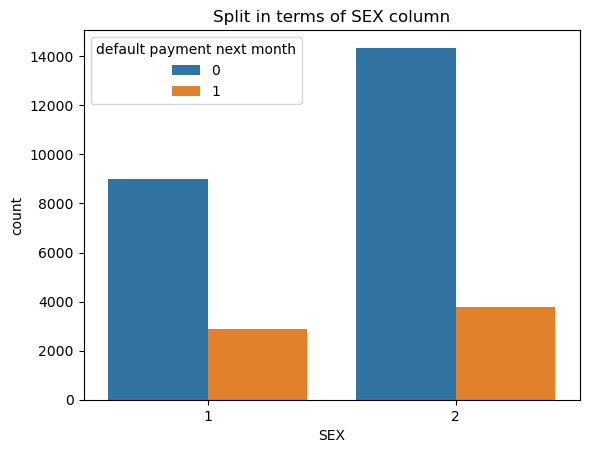

In [14]:
plt.title('Split in terms of SEX column')
ax = sns.countplot(x='SEX', hue='default payment next month', data=dataframe)
plt.show()

#### On above chart and below calculation we can see that males are slighty more likely to be defaulters. It is easy task for classificators to detect it and no feature engineering is needed here.

In [15]:
print('For males',round(pd.Series(dataframe[dataframe['SEX']==1]['default payment next month']).value_counts(normalize=True)*100, 1))
print('For females',round(pd.Series(dataframe[dataframe['SEX']==2]['default payment next month']).value_counts(normalize=True)*100, 1))

For males default payment next month
0    75.8
1    24.2
Name: proportion, dtype: float64
For females default payment next month
0    79.2
1    20.8
Name: proportion, dtype: float64


#### For the AGE and LIMIT_BAL columns that contain numeric data, you can visualize it by estimating the density of the distribution for labels 1 and labels 0 on a single graph.
#### The graph below for AGE shows that the density of the distributions is different for labels 0 and 1 depending on age, this can be helpful when evaluating classifiers. We can create additional column with with values 0-26 are more likely to be defaulters , 26-36 less likely to be defaulters and others with so significant difference.

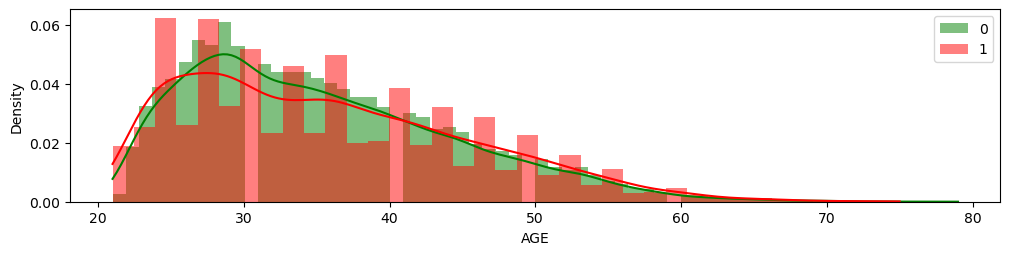

In [16]:
plt.figure(figsize=(12, 2.5))
sns.histplot(dataframe.loc[dataframe['default payment next month']==0, 'AGE'], kde=True, stat="density", linewidth=0,color='green', label='0')
sns.histplot(dataframe.loc[dataframe['default payment next month']==1, 'AGE'], kde=True, stat="density", linewidth=0, color='red', label='1')
plt.legend(loc='upper right')
plt.show()

In [17]:
def age_range(row):
    if row['AGE'] <= 26:
        age = 0
    elif (row['AGE'] > 26) & (row['AGE'] < 36):
        age = 1
    else:
        age =2
    return age

In [18]:
dataframe['F_E_AGE'] = dataframe.apply(lambda row: age_range(row),axis=1)

#### Also, based on the credit limit granted, it can be seen that the distribution density is different for labels 1 and 0, especially in the case of lower amounts. We can create additional column with with values 0-130k are more likely to be defaulters , above 130k less likely to be defaulters.

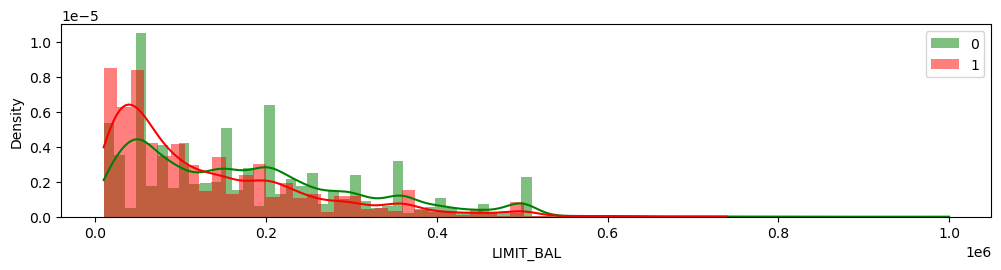

In [19]:
plt.figure(figsize=(12, 2.5))
sns.histplot(dataframe.loc[(dataframe['default payment next month']==0), 'LIMIT_BAL'], kde=True, stat="density", linewidth=0, color='green', label='0')
sns.histplot(dataframe.loc[(dataframe['default payment next month']==1), 'LIMIT_BAL'], kde=True, stat="density", linewidth=0, color='red', label='1')
plt.legend(loc='upper right')
plt.show()

In [20]:
def limit_range(row):
    if row['LIMIT_BAL'] <= 130000:
        limit = 0
    else:
        limit =1
    return limit

In [21]:
dataframe['F_E_LIMIT'] = dataframe.apply(lambda row: limit_range(row),axis=1)

#### We can also consider columns PAY_0 - PAY_6 (History of past payment) as good feature to detect defaulters. If payment delay is one month we can see more less same ammount of defaulters and not defaulters but with 2 months we can observe larger density for defaulters. We have values from -2 to 8 so we can consider it as categorical feature or numeric. It should be easy to detect by classifier. However we can try to combine PAY_0 - PAY_6 columns to one column and check if frequent problems with payment can give us additional information...

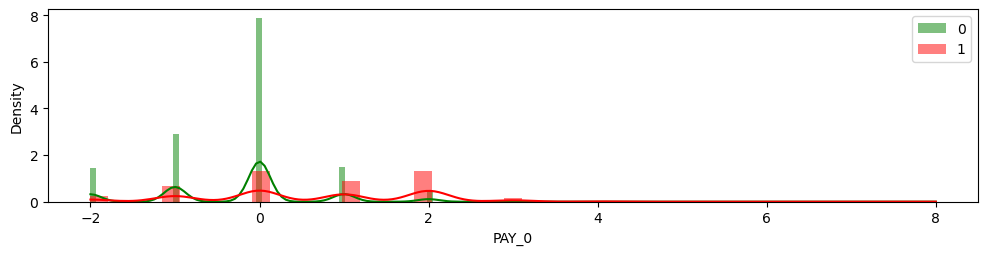

In [22]:
plt.figure(figsize=(12, 2.5))
sns.histplot(dataframe.loc[dataframe['default payment next month']==0, 'PAY_0'], kde=True, stat="density", linewidth=0,color='green', label='0')
sns.histplot(dataframe.loc[dataframe['default payment next month']==1, 'PAY_0'], kde=True, stat="density", linewidth=0, color='red', label='1')
plt.legend(loc='upper right')
plt.show()

#### We can try for example to sum up all columns  PAY_0 - PAY_6 values for each row and see if there is some additional information that we can use. 

In [23]:
def summary_of_delay(row):
    all_pay_sum = row['PAY_0'] + row['PAY_2']+ row['PAY_3']+ row['PAY_4']+ row['PAY_5']+ row['PAY_6']
    return all_pay_sum

In [24]:
dataframe['F_E_PAY_SUM'] = dataframe.apply(lambda row: summary_of_delay(row),axis=1)

#### On below chart we can see that person with cumulative zero delay in payment is less likely to be defaulter - density is higher. We can perform Feature engineering with this column and make some points more clear for classifier

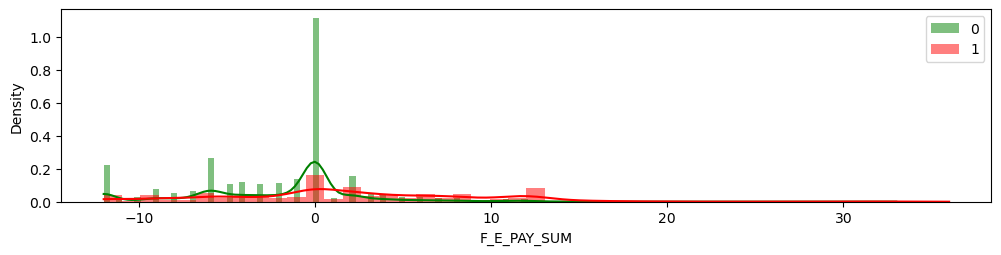

In [25]:
plt.figure(figsize=(12, 2.5))
sns.histplot(dataframe.loc[dataframe['default payment next month']==0, 'F_E_PAY_SUM'], kde=True, stat="density", linewidth=0,color='green', label='0')
sns.histplot(dataframe.loc[dataframe['default payment next month']==1, 'F_E_PAY_SUM'], kde=True, stat="density", linewidth=0, color='red', label='1')
plt.legend(loc='upper right')
plt.show()

In [26]:
def summary_of_delay_0_1(row):
    if row['F_E_PAY_SUM'] == 0:
        all_pay_sum_0_1 = 0
    else:
        all_pay_sum_0_1 = 1
    return all_pay_sum_0_1

In [27]:
dataframe['F_E_PAY_SUM'] = dataframe.apply(lambda row: summary_of_delay_0_1(row),axis=1)

#### BILL_AMT1 seems to give us no great benefits in terms of defaulter predictions. It seems that value 0 has a bit larger density of not defaulers but it  is not sigificiant. 

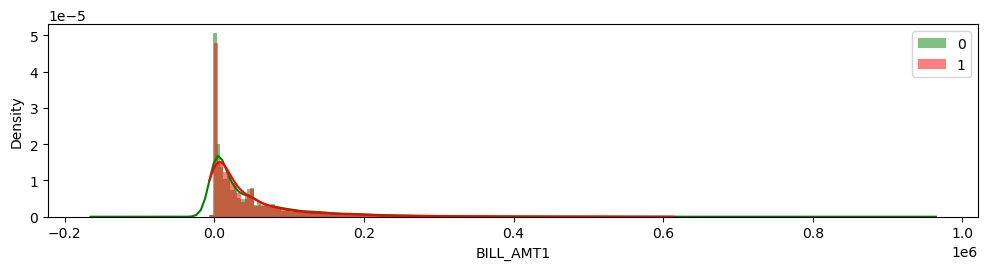

In [28]:
plt.figure(figsize=(12, 2.5))
sns.histplot(dataframe.loc[dataframe['default payment next month']==0, 'BILL_AMT1'], kde=True, stat="density", linewidth=0,color='green', label='0')
sns.histplot(dataframe.loc[dataframe['default payment next month']==1, 'BILL_AMT1'], kde=True, stat="density", linewidth=0, color='red', label='1')
plt.legend(loc='upper right')
plt.show()

#### what about proportions of not defaulers and defaulters for bill statement value = 0 and rest of population. Slight difference is visible in below calculation. But the difference is not large.

In [29]:
print('% of not defaulters and defaulters in case of ammount of bill statement (BILL_AMT1) = 0 ///',round(pd.Series(dataframe[dataframe['BILL_AMT1']==0]['default payment next month']).value_counts(normalize=True)*100, 1))
print('% of not defaulters and defaulters in case of ammount of bill statement (BILL_AMT1) != 0 ///',round(pd.Series(dataframe[dataframe['BILL_AMT1']!=0]['default payment next month']).value_counts(normalize=True)*100, 1))


% of not defaulters and defaulters in case of ammount of bill statement (BILL_AMT1) = 0 /// default payment next month
0    73.4
1    26.6
Name: proportion, dtype: float64
% of not defaulters and defaulters in case of ammount of bill statement (BILL_AMT1) != 0 /// default payment next month
0    78.2
1    21.8
Name: proportion, dtype: float64


#### Let's try to accumulate data when bill statement value = 0 for the last 6 months. We will simply calculate them - make summary

In [30]:
def summary_of_delay(row):
    counter=0
    if row['BILL_AMT1'] == 0:
        counter +=1
    if row['BILL_AMT2'] == 0:
        counter +=1
    if row['BILL_AMT3'] == 0:
        counter +=1
    if row['BILL_AMT4'] == 0:
        counter +=1
    if row['BILL_AMT5'] == 0:
        counter +=1
    if row['BILL_AMT6'] == 0:
        counter +=1
    return counter

In [31]:
dataframe['F_E_BILL_AMT_SUMMARY'] = dataframe.apply(lambda row: summary_of_delay(row),axis=1)

#### We can see that proportions are similar except of last one. It is quite interesting that when bill statement was 0 for 6 month then such group has almost of 50% of defaulters. Interesting. We will modify this column and for values 0-5 we will give value 1 and for 6 value 0 to make it more visible for model. 

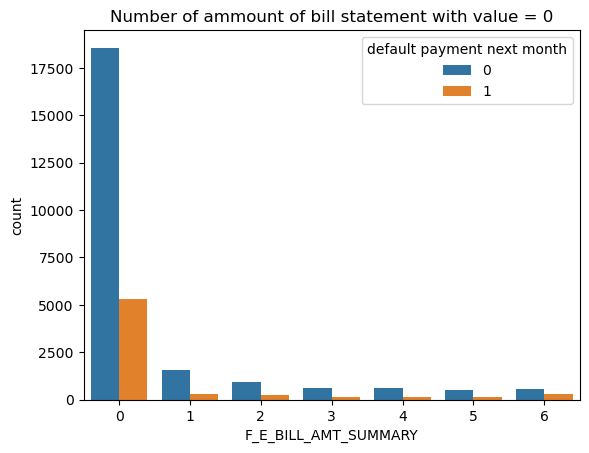

In [32]:
plt.title('Number of ammount of bill statement with value = 0')
sns.countplot(x='F_E_BILL_AMT_SUMMARY', hue='default payment next month', data=dataframe)
plt.show()

In [33]:
def sum_bill_amt_0_1(row):
    if row['F_E_BILL_AMT_SUMMARY'] == 6:
        hydra = 0
    else:
        hydra = 1
    return hydra

In [34]:
dataframe['F_E_BILL_AMT_SUMMARY'] = dataframe.apply(lambda row: sum_bill_amt_0_1(row),axis=1)

#### We will also check PAY_AMT1 if we can benefit in that (previous payment). We can see large difference in density arround 0 value, but it is not clear due to the wide range of values

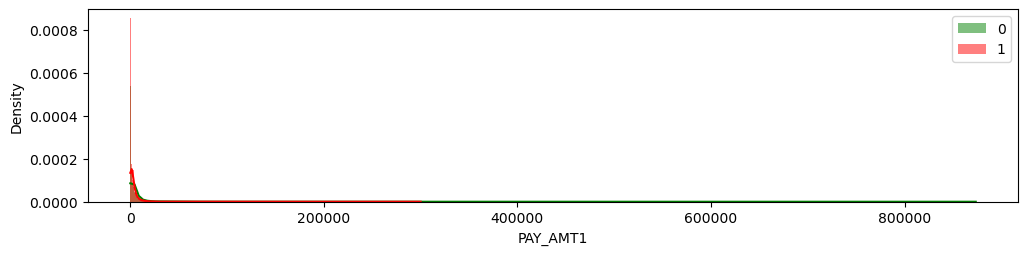

In [35]:
plt.figure(figsize=(12, 2.5))
sns.histplot(dataframe.loc[((dataframe['default payment next month']==0)&(dataframe['PAY_AMT1']<1000000)), 'PAY_AMT1'], kde=True, stat="density", linewidth=0,color='green', label='0')
sns.histplot(dataframe.loc[((dataframe['default payment next month']==1)&(dataframe['PAY_AMT1']<1000000)), 'PAY_AMT1'], kde=True, stat="density", linewidth=0, color='red', label='1')
plt.legend(loc='upper right')
plt.show()

#### After changing the range we can still see that previous payments arround 0 can be a good factor. Lets check it with details

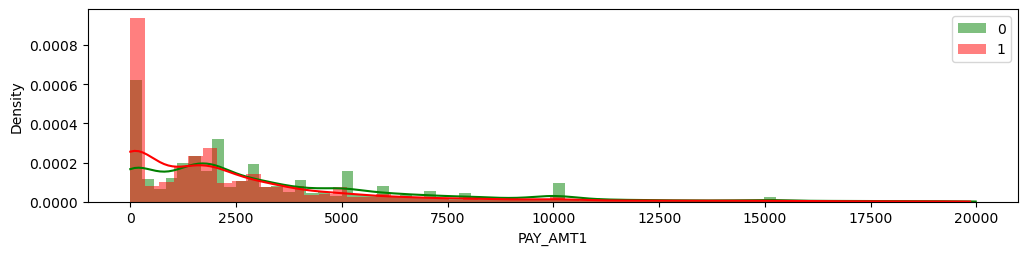

In [36]:
plt.figure(figsize=(12, 2.5))
sns.histplot(dataframe.loc[((dataframe['default payment next month']==0)&(dataframe['PAY_AMT1']<20000)), 'PAY_AMT1'], kde=True, stat="density", linewidth=0,color='green', label='0')
sns.histplot(dataframe.loc[((dataframe['default payment next month']==1)&(dataframe['PAY_AMT1']<20000)), 'PAY_AMT1'], kde=True, stat="density", linewidth=0, color='red', label='1')
plt.legend(loc='upper right')
plt.show()

#### We will check if there is a large difference in case of defaulters and not defaulters if we consider last payment = 0 

In [37]:
print('% of not defaulters and defaulters in case previous payment (PAY_AMT1) = 0 ///',round(pd.Series(dataframe[dataframe['PAY_AMT6']==0]['default payment next month']).value_counts(normalize=True)*100, 1))
print('% of not defaulters and defaulters in case previous payment (PAY_AMT1) != 0 ///',round(pd.Series(dataframe[dataframe['PAY_AMT6']!=0]['default payment next month']).value_counts(normalize=True)*100, 1))


% of not defaulters and defaulters in case previous payment (PAY_AMT1) = 0 /// default payment next month
0    71.0
1    29.0
Name: proportion, dtype: float64
% of not defaulters and defaulters in case previous payment (PAY_AMT1) != 0 /// default payment next month
0    80.0
1    20.0
Name: proportion, dtype: float64


#### We can see large difference in proportions - 36% vs 20%. We can use it. We will try aslo to accumulate values from PAY_AMT1 - PAY_AMT6

In [38]:
def summary_of_delay(row):
    counter=0
    if row['PAY_AMT1'] == 0:
        counter +=1
    if row['PAY_AMT2'] == 0:
        counter +=1
    if row['PAY_AMT3'] == 0:
        counter +=1
    if row['PAY_AMT4'] == 0:
        counter +=1
    if row['PAY_AMT5'] == 0:
        counter +=1
    if row['PAY_AMT6'] == 0:
        counter +=1
    return counter

In [39]:
dataframe['F_E_PAY_AMT_SUMMARY'] = dataframe.apply(lambda row: summary_of_delay(row),axis=1)

#### We can see a large difference in case of customers that have never last month payment = 0 comparing with those who have 1-6 no payments last month. In below chart we can see that first group has arrounf 15% of defaulters when other groups have arround 50% of defaulters. Let's USE IT!

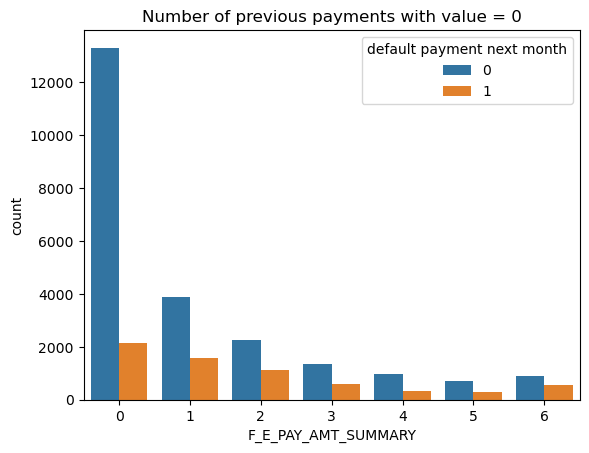

In [40]:
plt.title('Number of previous payments with value = 0')
sns.countplot(x='F_E_PAY_AMT_SUMMARY', hue='default payment next month', data=dataframe)
plt.show()

#### As a final step in the preliminary analysis, correlation for numerical data will be checked for the possibility of applying PCA.
#### As can be seen in the matrix below, there are strong correlations for the BIL_AMT data and bit lower for PAY.

In [41]:
column_names = dataframe.columns.tolist()
non_corr_features = ['SEX','EDUCATION','MARRIAGE','ID', 'default payment next month', 'F_E_AGE', 'F_E_LIMIT', 'F_E_PAY_SUM',   'F_E_BILL_AMT_SUMMARY',  'F_E_PAY_AMT_SUMMARY']
correlation_data = [num_f for num_f in column_names if num_f not in non_corr_features]

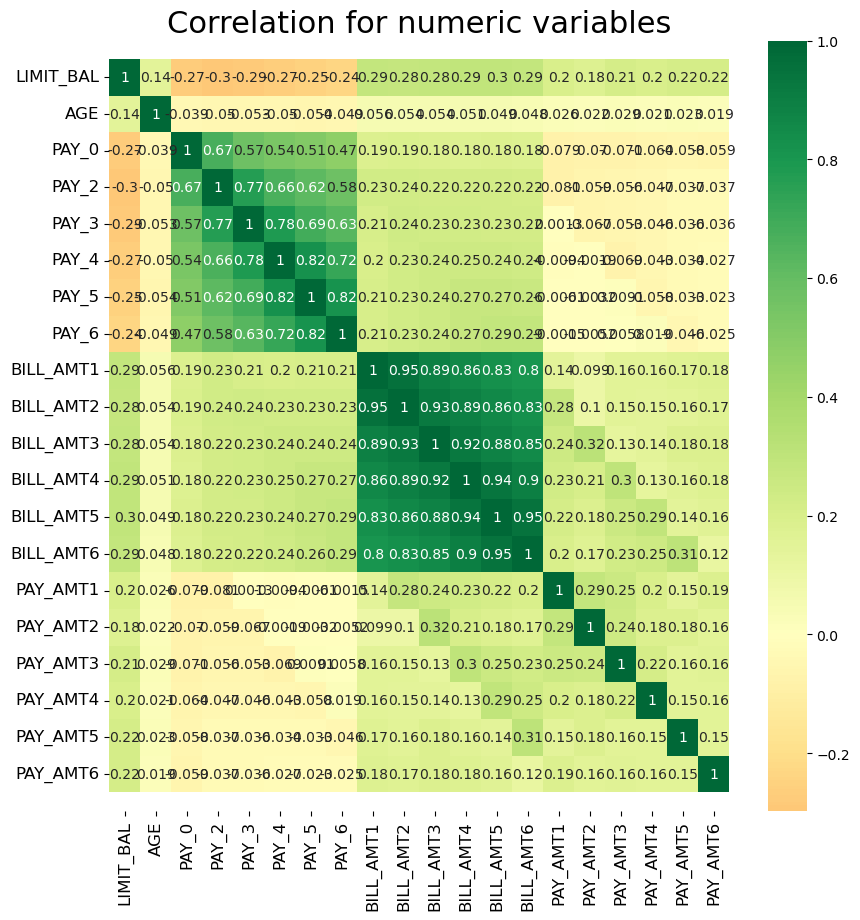

In [42]:
plt.figure(figsize=(10, 10))
ax = sns.heatmap(dataframe[correlation_data].corr(),
                 xticklabels=dataframe[correlation_data].corr().columns,
                 yticklabels=dataframe[correlation_data].columns,
                 cmap='RdYlGn',
                 center=0,
                 annot=True)

plt.title('Correlation for numeric variables', fontsize=22)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

#### The ID column does not provide any useful information so it is removed

In [43]:
dataframe.drop(['ID'], axis=1, inplace=True)

#### Data are assigned to X and y and split into test (20%) and training sets (80%). Stratification is extremely important in the case of imbalanced classes.

In [44]:
X = dataframe.drop(['default payment next month'], axis=1).copy()
y = dataframe['default payment next month'].copy()

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#### Data are recovered from file to get clean data without any feature engineering for basic model comparision

In [46]:
dataframe = pd.read_excel('default_of_credit_card_clients.xls', header=1)
dataframe.drop(['ID'], axis=1, inplace=True)
X_basic = dataframe.drop(['default payment next month'], axis=1).copy()
y_basic = dataframe['default payment next month'].copy()
X_train_basic, X_test_basic, y_train_basic, y_test_basic = train_test_split(X_basic, y_basic, test_size=0.2, random_state=42, stratify=y)

#### Two classes are created which will be responsible for modifications in the EDUCATION and MARRIAGE columns in the pipeline, according to the previously performed analysis.

In [47]:
class Filter_Education(BaseEstimator, TransformerMixin):
    def __init__(self, column):
        self.column = column

    def fit(self, X, y = None ):
        return self

    def transform(self, X, y = None ):
        X_transformed = X.copy()
        column = self.column
        X_transformed.loc[~X_transformed[column].isin([1, 2, 3, 4]), column] = 4
        return X_transformed

In [48]:
class Filter_Marriage(BaseEstimator, TransformerMixin):
    def __init__(self, column):
        self.column = column

    def fit(self, X, y = None ):
        return self

    def transform(self, X, y = None ):
        X_transformed = X.copy()
        column = self.column
        X_transformed.loc[~X_transformed[column].isin([1, 2, 3 ]), column] = 3
        return X_transformed

#### Function definition for displaying results and aggregating them into one table

In [49]:
def result_summary(classifier_name, predict_test, metrics_df, y_test):
    report = classification_report(y_test, predict_test, output_dict=True)
    metrics_df.loc[metrics_df.shape[0]] = [classifier_name,'0',report['0']['precision'],report['0']['recall'],report['0']['f1-score']]
    metrics_df.loc[metrics_df.shape[0]] = [classifier_name,'1',report['1']['precision'],report['1']['recall'],report['1']['f1-score']]
    metrics_df.loc[metrics_df.shape[0]] = [classifier_name,'weighted avg',report['weighted avg']['precision'],report['weighted avg']['recall'],report['weighted avg']['f1-score']]
    print(classification_report(y_test, predict_test))
    
    cm = confusion_matrix(y_test, predict_test)
    ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
    ax.set_title('Confusion Matrix\n\n')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')
    plt.show()

    return metrics_df

#### Defining a function that finds the optimal threshold for neural networks that will allow obtaining the maximum F1 Score for class "1"

In [50]:
def max_treshold(y_pred_prob,  y_test):
    treshold = (np.arange(10, 90, 0.5)/100).tolist()
    max_tr = [0,0]
    for tresh in treshold:
        y_pred = (y_pred_prob > tresh).astype(int)
        report_cl = classification_report(y_test, y_pred, output_dict=True)
        f1 = report_cl['1']['f1-score']
        if f1 > max_tr[1]:
            max_tr = [tresh,f1]
    return max_tr[0]

#### Definition of which data will be treated as numeric and which as categorical (for the use of OneHotEncoder)

In [51]:
column_names = X.columns.tolist()
cat_features = ['SEX','EDUCATION','MARRIAGE', 'F_E_AGE', 'F_E_LIMIT', 'F_E_PAY_SUM', 'F_E_BILL_AMT_SUMMARY', 'F_E_PAY_AMT_SUMMARY']
num_features = [num_f for num_f in column_names if num_f not in cat_features]

In [52]:
column_names_basic = X_basic.columns.tolist()
cat_features_basic = ['SEX','EDUCATION','MARRIAGE']
num_features_basic = [num_f for num_f in column_names_basic if num_f not in cat_features_basic]

In [53]:
metrics_df = pd.DataFrame(columns = ['Classifier', 'Class', 'Precision', 'Recall','F1-score'])

## Model evaluation method.

#### The assumption is that fraud (class 1) is a rare phenomenon, so the right choice of model efficiency in this case is very important. The following are available: precision - informs about the accuracy of predictions for the fraud class, Recall determines the model's ability to detect all cases of the positive class, and F1 Score which is the harmonic mean of Precision and Recall.
#### it was assumed that the priority is to minimize the number of False Negatives, i.e. situations when fraud is not predicted. Such a situation leads to the most painful losses. Recall is crucial because we want to detect as many real frauds as possible. Up to a point, even at the expense of the number of False Positives. It is therefore permissible to sacrifice precision to a certain extent in order to achieve higher recall. However, too low precision will cause customers who are not fraudsters to be treated as fraudsters, so the potential profit that can be achieved thanks to them will be squandered.
#### A good solution for this problem may be F1 Score (for class 1) which is a compromise between Recall and Precision
#### So F1 Score will be used to optimize the models and  monitoring of this indicator as well as Precision and Recall is required.

## Selecting the best performing classifiers for binary classification with unbalanced classes

#### Logistic regression - a simple model that allows balancing of imbalanced classes using class_weight
#### SVM - This is a model that will focus on maximizing the margin between classes, which can improve the classification of the minority class. It also has a class_weight parameter that can be used to balance the influence of imbalanced classes.
#### KNN - uses local neighborhood for classification, an imbalanced class will require optimizing the number of neighbors or changing the distance measure
#### Random Forest - due to the possibility of repeated sampling it copes well with small minority datasets. It also has a class_weight parameter for the minority class
#### XGBoost - is an efficient gradient boosting algorithm, naturally resistant to imbalance. The scale_pos_weight parameter can be used to balance classes during training
#### Neural Network - Finally, the neural network will be trained and results will be compered with previous classifiers. To cope with data imbalance the SMOTE method will be used. 

## LogisticRegression Classifier

#### The first classifier that will be used is LogisticRegression. First basic model will be trained to get results for comparision. Basic dataset is used without feature engineering to comapre results.

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4673
           1       0.69      0.24      0.36      1327

    accuracy                           0.81      6000
   macro avg       0.76      0.61      0.62      6000
weighted avg       0.79      0.81      0.77      6000



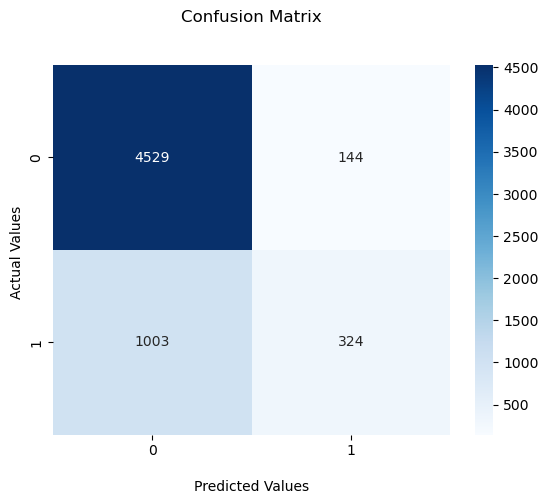

In [54]:
# BASIC MODEL RESULTS
num_preparation = Pipeline(steps=[
    ('fill_missings', SimpleImputer(strategy='mean')),
    ('scaler_1', StandardScaler()),
    ('pca', PCA()),
    ('scaler_2', StandardScaler()),
                                 ])

cat_preparation = Pipeline(steps=[
    ('encoder', OneHotEncoder(sparse_output=False ,handle_unknown='ignore'))
])

data_preparation = ColumnTransformer(transformers=[
    ('numeric_preprocessing', num_preparation, num_features_basic),
    ('categorical_preprocessing', cat_preparation, cat_features_basic)
])

model_pipeline_basic = Pipeline(steps=[('preprocessor', data_preparation),
                                    ('model', LogisticRegression())])

model_pipeline_basic.fit(X_train_basic, y_train_basic)
metrics_df = result_summary("LogisticRegression BASIC", model_pipeline_basic.predict(X_test_basic), metrics_df, y_test_basic)

#### In the first step, a Pipeline is prepared, the purpose of which is to prepare the data for classification, so that gridSeach can also be used. Numeric Data need to be scaled for LogisticRegression and for PCA. This is why StandardScaler() is used two times. All previously defined classes are used. OneHotEncoder is used on all categorical data. Data are not balanced so LogisticRegression will be run with class_weight='balanced' to cover this issue.

In [55]:
num_preparation = Pipeline(steps=[
    ('fill_missings', SimpleImputer(strategy='mean')),
    ('scaler_1', StandardScaler()),
    ('pca', PCA()),
    ('scaler_2', StandardScaler()),
                                 ])

cat_preparation = Pipeline(steps=[
    ('filter_education', Filter_Education(column='EDUCATION')),
    ('filter_marriage', Filter_Marriage(column='MARRIAGE')),
    ('encoder', OneHotEncoder(sparse_output=False ,handle_unknown='ignore'))
])

data_preparation = ColumnTransformer(transformers=[
    ('numeric_preprocessing', num_preparation, num_features),
    ('categorical_preprocessing', cat_preparation, cat_features)
])

model_pipeline_v1 = Pipeline(steps=[('preprocessor', data_preparation),
                                    ('model', LogisticRegression(class_weight='balanced',  max_iter=10000))])


#### GridSearch finds the best parameters for training the model to optimize the F1 Score for class 1. Once found, the model is saved to a variable and result_summary function is called that will display the results and save them to a table.

Fitting 5 folds for each of 48 candidates, totalling 240 fits


C:\Users\piotr\anaconda3\envs\condaenv4\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


Best Hyperparameters: {'model__C': 0.01, 'model__penalty': None, 'model__solver': 'sag', 'preprocessor__numeric_preprocessing__pca__n_components': 0.94}
              precision    recall  f1-score   support

           0       0.88      0.75      0.81      4673
           1       0.41      0.63      0.50      1327

    accuracy                           0.72      6000
   macro avg       0.64      0.69      0.65      6000
weighted avg       0.77      0.72      0.74      6000



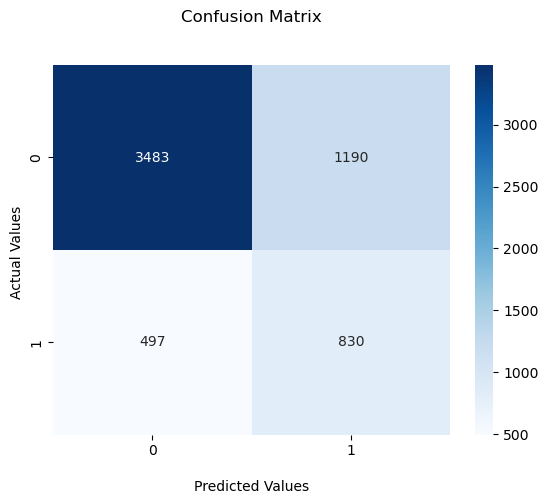

In [56]:
params = {
    'preprocessor__numeric_preprocessing__pca__n_components': [0.90, 0.94, 0.97],
    'model__C': [0.01, 0.05, 0.1, 1 ],
    'model__penalty': ['l2', None],
    'model__solver': ['sag', 'saga']
}

grid_search = GridSearchCV(model_pipeline_v1, 
                           params, 
                           cv=5, 
                           n_jobs=-1, 
                           verbose=2, 
                           scoring=make_scorer(f1_score, pos_label=1)
                          )

grid_search.fit(X_train, y_train)
print("Best Hyperparameters:", grid_search.best_params_)
model_pipeline_LogReg = grid_search.best_estimator_
metrics_df = result_summary("LogisticRegression", model_pipeline_LogReg.predict(X_test), metrics_df, y_test)

## SVM Classifier

#### Next classifier that will be used is SVM. 

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      4673
           1       0.68      0.31      0.43      1327

    accuracy                           0.82      6000
   macro avg       0.76      0.64      0.66      6000
weighted avg       0.80      0.82      0.79      6000



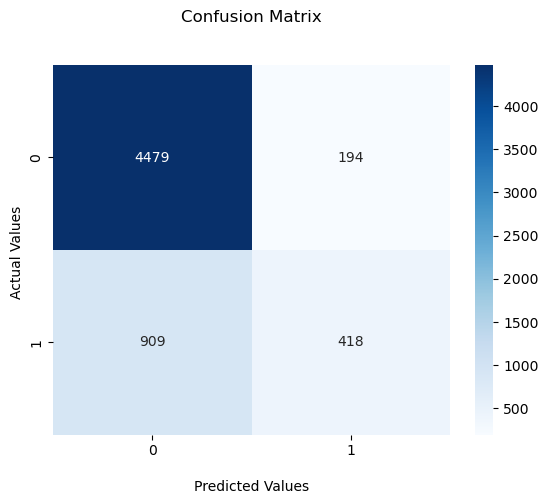

In [57]:
# BASIC MODEL RESULTS
num_preparation = Pipeline(steps=[
    ('fill_missings', SimpleImputer(strategy='mean')),
    ('scaler_1', StandardScaler()),
    ('pca', PCA()),
    ('scaler_2', StandardScaler()),
                                 ])

cat_preparation = Pipeline(steps=[
    ('encoder', OneHotEncoder(sparse_output=False ,handle_unknown='ignore'))
])

data_preparation = ColumnTransformer(transformers=[
    ('numeric_preprocessing', num_preparation, num_features_basic),
    ('categorical_preprocessing', cat_preparation, cat_features_basic)
])

model_pipeline_basic = Pipeline(steps=[('preprocessor', data_preparation),
                                    ('model', SVC())])
model_pipeline_basic.fit(X_train_basic, y_train_basic)
metrics_df = result_summary("SVM BASIC", model_pipeline_basic.predict(X_test_basic), metrics_df, y_test_basic)


#### In the first step, a Pipeline is prepared, the purpose of which is to prepare the data for classification, so that gridSeach can also be used. Numeric Data need to be scaled for SVM and for PCA. This is why StandardScaler() is used two times. All previously defined classes are used. OneHotEncoder is used on all categorical data. Data are not balanced so SVM will be run with class_weight='balanced' to cover this issue.

In [58]:
num_preparation = Pipeline(steps=[
    ('fill_missings', SimpleImputer(strategy='mean')),
    ('scaler_1', StandardScaler()),
    ('pca', PCA()),
    ('scaler_2', StandardScaler()),
                                 ])

cat_preparation = Pipeline(steps=[
    ('filter_education', Filter_Education(column='EDUCATION')),
    ('filter_marriage', Filter_Marriage(column='MARRIAGE')),
    ('encoder', OneHotEncoder(sparse_output=False ,handle_unknown='ignore'))
])

data_preparation = ColumnTransformer(transformers=[
    ('numeric_preprocessing', num_preparation, num_features),
    ('categorical_preprocessing', cat_preparation, cat_features)
])

model_pipeline_v2 = Pipeline(steps=[('preprocessor', data_preparation),
                                    ('model', SVC(class_weight='balanced', kernel='poly', gamma='scale'))])

#### GridSearch finds the best parameters for training the model to optimize the F1 Score for class 1. Once found, the model is saved to a variable and result_summary function is called that will display the results and save them to a table.

Fitting 4 folds for each of 6 candidates, totalling 24 fits
Best Hyperparameters: {'model__C': 0.1, 'preprocessor__numeric_preprocessing__pca__n_components': 0.96}
              precision    recall  f1-score   support

           0       0.87      0.82      0.85      4673
           1       0.48      0.58      0.52      1327

    accuracy                           0.77      6000
   macro avg       0.67      0.70      0.68      6000
weighted avg       0.79      0.77      0.77      6000



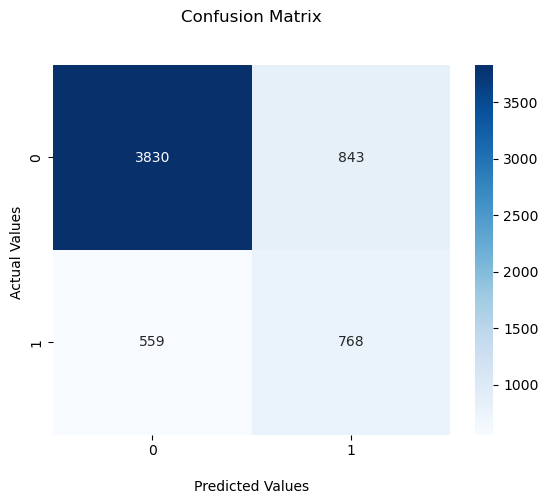

In [59]:
params = {
    'preprocessor__numeric_preprocessing__pca__n_components': [0.96, 0.98],
    'model__C': [0.01, 0.1, 1]   
}

grid_search = GridSearchCV(model_pipeline_v2, 
                           params, 
                           cv=4, 
                           n_jobs=-1, 
                           verbose=2, 
                           scoring = make_scorer(f1_score, pos_label=1)
                          )

grid_search.fit(X_train, y_train)
print("Best Hyperparameters:", grid_search.best_params_)
model_pipeline_SVM = grid_search.best_estimator_
metrics_df = result_summary("SVM", model_pipeline_SVM.predict(X_test), metrics_df, y_test)

## KNN Classifier 

#### Next classifier that will be used is KNN. 

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      4673
           1       0.54      0.38      0.45      1327

    accuracy                           0.79      6000
   macro avg       0.69      0.64      0.66      6000
weighted avg       0.77      0.79      0.78      6000



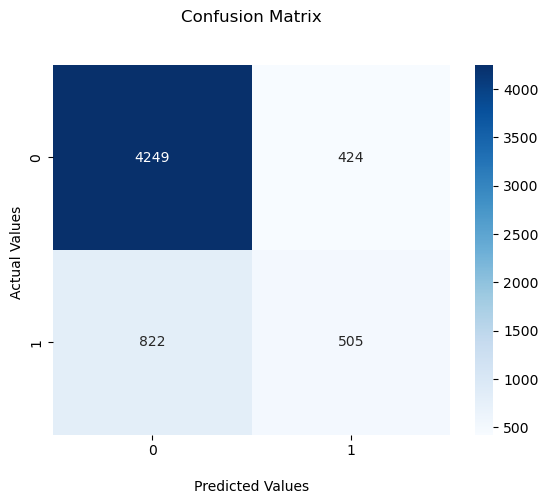

In [60]:
# BASIC MODEL RESULTS
num_preparation = Pipeline(steps=[
    ('fill_missings', SimpleImputer(strategy='mean')),
    ('scaler_1', StandardScaler()),
    ('pca', PCA()),
    ('scaler_2', StandardScaler()),
                                 ])

cat_preparation = Pipeline(steps=[
    ('encoder', OneHotEncoder(sparse_output=False ,handle_unknown='ignore'))
])

data_preparation = ColumnTransformer(transformers=[
    ('numeric_preprocessing', num_preparation, num_features_basic),
    ('categorical_preprocessing', cat_preparation, cat_features_basic)
])

model_pipeline_basic = Pipeline(steps=[('preprocessor', data_preparation),
                                    ('model', KNeighborsClassifier())])
model_pipeline_basic.fit(X_train_basic, y_train_basic)
metrics_df = result_summary("KNN BASIC", model_pipeline_basic.predict(X_test_basic), metrics_df, y_test_basic)


#### In the first step, a Pipeline is prepared, the purpose of which is to prepare the data for classification, so that gridSeach can also be used. Numeric Data need to be scaled for KNN and for PCA. This is why StandardScaler() is used two times. All previously defined classes are used. OneHotEncoder is used on all categorical data. Data are not balanced so KNN will be run with weights='distance' to cover this issue.

In [61]:
num_preparation = Pipeline(steps=[
    ('fill_missings', SimpleImputer(strategy='mean')),
    ('scaler_1', StandardScaler()),
    ('pca', PCA()),
    ('scaler_2', StandardScaler()),
                                 ])

cat_preparation = Pipeline(steps=[
    ('filter_education', Filter_Education(column='EDUCATION')),
    ('filter_marriage', Filter_Marriage(column='MARRIAGE')),
    ('encoder', OneHotEncoder(sparse_output=False ,handle_unknown='ignore'))
])

data_preparation = ColumnTransformer(transformers=[
    ('numeric_preprocessing', num_preparation, num_features),
    ('categorical_preprocessing', cat_preparation, cat_features)
])

model_pipeline_v3 = Pipeline(steps=[('preprocessor', data_preparation),
                                    ('model', KNeighborsClassifier(weights='distance'))])

#### GridSearch finds the best parameters for training the model to optimize the F1 Score for class 1. Once found, the model is saved to a variable and result_summary function is called that will display the results and save them to a table.

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Hyperparameters: {'model__metric': 'minkowski', 'model__n_neighbors': 30, 'model__weights': 'distance', 'preprocessor__numeric_preprocessing__pca__n_components': 0.94}
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.65      0.36      0.46      1327

    accuracy                           0.82      6000
   macro avg       0.74      0.65      0.67      6000
weighted avg       0.80      0.82      0.79      6000



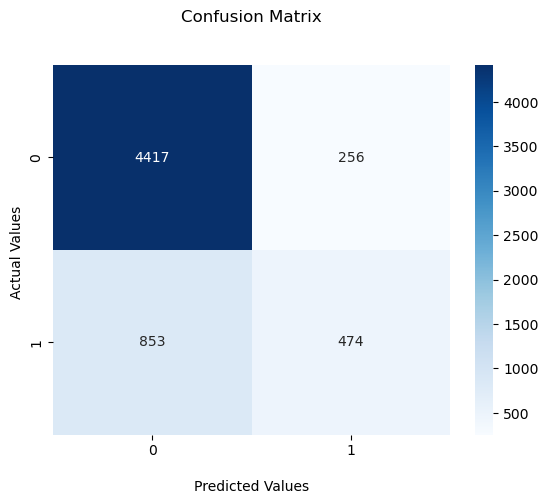

In [62]:
params = {
    'preprocessor__numeric_preprocessing__pca__n_components': [0.90, 0.94, 0.98],
    'model__n_neighbors': [ 20, 30, 40], 
    'model__weights': ['uniform', 'distance'],                
    'model__metric': ['minkowski',  'euclidean', 'manhattan']
}

grid_search = GridSearchCV(model_pipeline_v3, 
                           params, 
                           cv=5, 
                           n_jobs=-1, 
                           verbose=2, 
                           scoring = make_scorer(f1_score, pos_label=1)
                          )

grid_search.fit(X_train, y_train)
print("Best Hyperparameters:", grid_search.best_params_)
model_pipeline_KNN = grid_search.best_estimator_
metrics_df = result_summary("KNN", model_pipeline_KNN.predict(X_test), metrics_df, y_test)

## Pipeline fo RandomForestClassifier and XGBoost - BASIC MODEL

#### First we will prepare simple pipeline for Basic models training without Feature engineeting for basic data

In [63]:
# BASIC MODEL 
num_preparation_RFC_XGB = 'passthrough'

cat_preparation_RFC_XGB = Pipeline(steps=[
    ('encoder', OneHotEncoder(sparse_output=False ,handle_unknown='ignore'))
])

data_preparation_RFC_XGB = ColumnTransformer(transformers=[
    ('numeric_preprocessing', num_preparation_RFC_XGB, num_features_basic),
    ('categorical_preprocessing', cat_preparation_RFC_XGB, cat_features_basic)
])

model_pipeline_basic_RFC = Pipeline(steps=[('preprocessor', data_preparation_RFC_XGB),
                                    ('model', RandomForestClassifier())])

model_pipeline_basic_XGB = Pipeline(steps=[('preprocessor', data_preparation_RFC_XGB),
                                    ('model', XGBClassifier())])

## Pipeline fo RandomForestClassifier and XGBoost with feature engineering 

#### RandomForestClassifier and XGBoost do not need data scaling, so the pipeline will be modified for them. Using one pipeline, the data will be prepared for both classifiers. In this case X_test data need to be transform separately to ensure that the test data is transformed in the same way as the training data.

In [64]:
num_preparation = Pipeline(steps=[
    ('fill_missings', SimpleImputer(strategy='mean'))
                                 ])

cat_preparation = Pipeline(steps=[
    ('filter_education', Filter_Education(column='EDUCATION')),
    ('filter_marriage', Filter_Marriage(column='MARRIAGE')),
    ('encoder', OneHotEncoder(sparse_output=False ,handle_unknown='ignore'))
])

data_preparation = ColumnTransformer(transformers=[
    ('numeric_preprocessing', num_preparation, num_features),
    ('categorical_preprocessing', cat_preparation, cat_features)
])

model_pipeline_v4 = Pipeline(steps=[('preprocessor', data_preparation)])

X_train_transform = model_pipeline_v4.fit_transform(X_train)
X_test_transform = model_pipeline_v4.transform(X_test)


## Random Forest Classifier

#### First a basic model is trained to get values for comparision with feature engineering and GridSearch

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4673
           1       0.64      0.36      0.46      1327

    accuracy                           0.81      6000
   macro avg       0.74      0.65      0.67      6000
weighted avg       0.79      0.81      0.79      6000



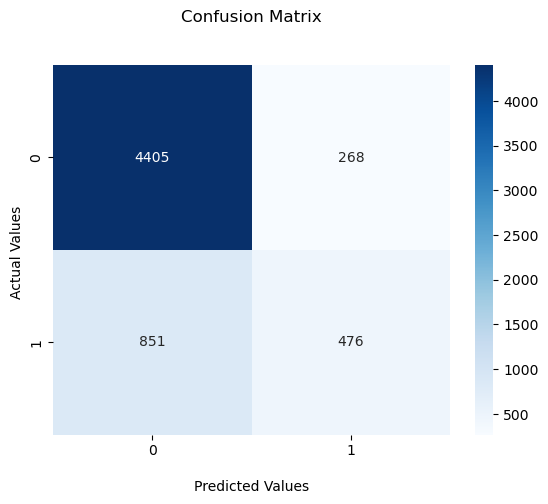

In [65]:
# BASIC MODEL 
model_pipeline_basic_RFC.fit(X_train_basic, y_train_basic)
metrics_df = result_summary("Random Forest BASIC", model_pipeline_basic_RFC.predict(X_test_basic), metrics_df, y_test_basic)

#### GridSearch finds the best parameters for training the model to optimize the F1 Score for class 1. Once found, the model is saved to a variable and result_summary function is called that will display the results and save them to a table.

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 20, 'min_samples_split': 20, 'n_estimators': 150}
              precision    recall  f1-score   support

           0       0.88      0.83      0.85      4673
           1       0.49      0.59      0.54      1327

    accuracy                           0.78      6000
   macro avg       0.69      0.71      0.69      6000
weighted avg       0.79      0.78      0.78      6000



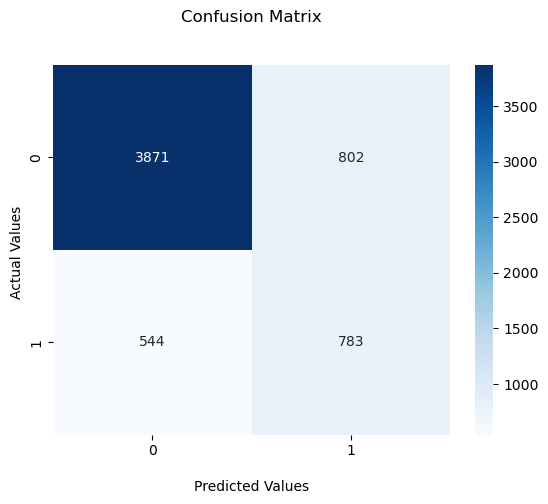

In [66]:
param_grid = {  
    'n_estimators': [ 95, 150, 300], 
    'max_depth': [None, 20, 30],        
    'min_samples_split': [ 10, 20, 30], 
    'min_samples_leaf': [ 5, 10, 20 ] 
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(class_weight= 'balanced'),
    param_grid=param_grid,
    scoring= make_scorer(f1_score, pos_label=1),
    cv=5,
    verbose=2,
    n_jobs=-1
) 

grid_search.fit(X_train_transform, y_train)
print("Best Hyperparameters:", grid_search.best_params_)
model_pipeline_RFC = grid_search.best_estimator_
metrics_df = result_summary("Random Forest", model_pipeline_RFC.predict(X_test_transform), metrics_df, y_test)

## XGBoost Classifier

#### First a basic model is trained to get values for comparision with feature engineering and GridSearch

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4673
           1       0.63      0.36      0.46      1327

    accuracy                           0.81      6000
   macro avg       0.73      0.65      0.67      6000
weighted avg       0.79      0.81      0.79      6000



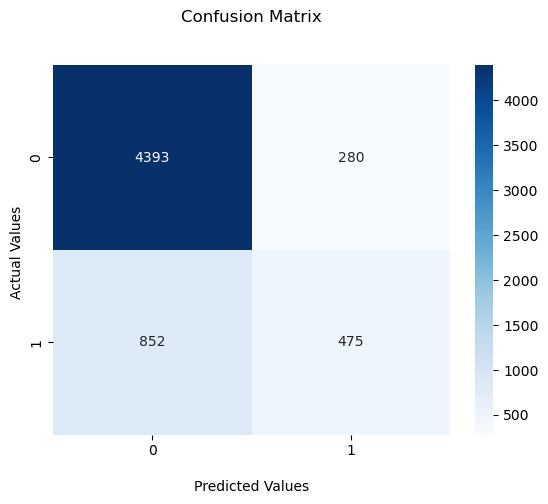

In [67]:
# BASIC MODEL 
model_pipeline_basic_XGB.fit(X_train_basic, y_train_basic)
metrics_df = result_summary("XGBoost BASIC", model_pipeline_basic_XGB.predict(X_test_basic), metrics_df, y_test_basic)

#### GridSearch finds the best parameters for training the model to optimize the F1 Score for class 1. Once found, the model is saved to a variable and result_summary function is called that will display the results and save them to a table.

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


C:\Users\piotr\anaconda3\envs\condaenv4\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Hyperparameters: {'colsample_bytree': 0.9, 'learning_rate': 0.03, 'max_depth': 4, 'n_estimators': 300, 'scale_pos_weight': 3.5, 'subsample': 0.9}
              precision    recall  f1-score   support

           0       0.88      0.81      0.84      4673
           1       0.48      0.62      0.54      1327

    accuracy                           0.77      6000
   macro avg       0.68      0.72      0.69      6000
weighted avg       0.79      0.77      0.78      6000



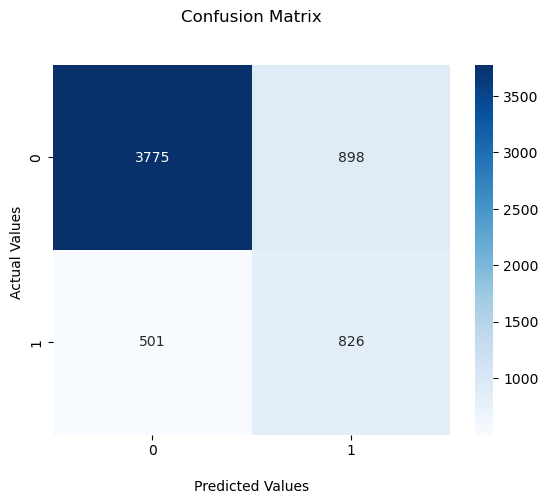

In [68]:
param_grid = {
    'learning_rate': [0.01, 0.03, 0.1 ],
    'scale_pos_weight': [2, 3.5, 4, 5 ],
    'n_estimators': [ 95, 150, 300 ],          
    'max_depth': [ 4, 5, 6 ],         
    'subsample': [0.6, 0.9], 
    'colsample_bytree': [0.7, 0.9] 
}

grid_search = GridSearchCV(
    estimator=XGBClassifier(objective='binary:logistic'),
    param_grid=param_grid,
    scoring= make_scorer(f1_score, pos_label=1),
    cv=5, 
    verbose=2,
    n_jobs=-1
) 

grid_search.fit(X_train_transform, y_train)
print("Best Hyperparameters:", grid_search.best_params_)
model_pipeline_XGB = grid_search.best_estimator_
metrics_df = result_summary("XGBoost", model_pipeline_XGB.predict(X_test_transform), metrics_df, y_test)

## Neural Network

#### First Basic model for Neural Network will be created. Basic dataset will be used with only basic transormations needed for proper model training. Feature engineering is not applied in thi case.

Epoch 1/50
563/563 - 3s - 5ms/step - Precision: 0.6365 - Recall: 0.2400 - loss: 0.4852 - val_Precision: 0.6806 - val_Recall: 0.3540 - val_loss: 0.4562
Epoch 2/50
563/563 - 1s - 1ms/step - Precision: 0.6440 - Recall: 0.3185 - loss: 0.4541 - val_Precision: 0.6927 - val_Recall: 0.3584 - val_loss: 0.4481
Epoch 3/50
563/563 - 1s - 1ms/step - Precision: 0.6535 - Recall: 0.3282 - loss: 0.4467 - val_Precision: 0.7024 - val_Recall: 0.3598 - val_loss: 0.4471
Epoch 4/50
563/563 - 1s - 1ms/step - Precision: 0.6627 - Recall: 0.3368 - loss: 0.4390 - val_Precision: 0.7074 - val_Recall: 0.3389 - val_loss: 0.4477
Epoch 5/50
563/563 - 1s - 1ms/step - Precision: 0.6703 - Recall: 0.3455 - loss: 0.4378 - val_Precision: 0.7108 - val_Recall: 0.3569 - val_loss: 0.4459
Epoch 6/50
563/563 - 1s - 1ms/step - Precision: 0.6655 - Recall: 0.3452 - loss: 0.4390 - val_Precision: 0.7045 - val_Recall: 0.3497 - val_loss: 0.4433
Epoch 7/50
563/563 - 1s - 1ms/step - Precision: 0.6615 - Recall: 0.3361 - loss: 0.4362 - val_P

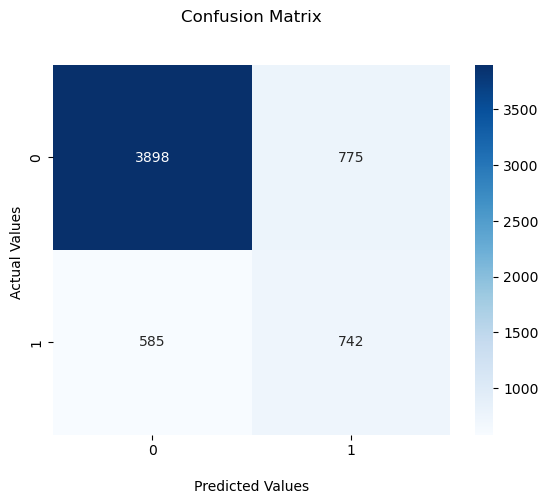

In [69]:
# BASIC MODEL RESULTS
num_preparation = Pipeline(steps=[
    ('fill_missings', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
                                 ])

cat_preparation = Pipeline(steps=[
    ('encoder', OneHotEncoder(sparse_output=False ,handle_unknown='ignore'))
])

data_preparation = ColumnTransformer(transformers=[
    ('numeric_preprocessing', num_preparation, num_features_basic),
    ('categorical_preprocessing', cat_preparation, cat_features_basic)
])

model_pipeline_v5_basic = Pipeline(steps=[('preprocessor', data_preparation)])

X_train_transform_basic = model_pipeline_v5_basic.fit_transform(X_train_basic)
X_test_transform_basic = model_pipeline_v5_basic.transform(X_test_basic)

model = Sequential([
    tf.keras.Input(shape=(X_train_transform_basic.shape[1],)),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['Precision', 'Recall'])

history = model.fit(X_train_transform_basic, y_train_basic, epochs=50, batch_size=32, validation_split=0.25, verbose=2)

y_pred_prob = model.predict(X_test_transform_basic)
max_tresh = max_treshold(y_pred_prob,  y_test_basic)
y_pred = (y_pred_prob > max_tresh).astype(int)
metrics_df = result_summary("Neural Network Basic", y_pred, metrics_df, y_test_basic)

#### Neural Network need data scaling, so the pipeline will be modified appropriately. In this case X_test data need to be transform separately to ensure that the test data is transformed in the same way as the training data.

In [70]:
num_preparation = Pipeline(steps=[
    ('fill_missings', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
                                 ])

cat_preparation = Pipeline(steps=[
    ('filter_education', Filter_Education(column='EDUCATION')),
    ('filter_marriage', Filter_Marriage(column='MARRIAGE')),
    ('encoder', OneHotEncoder(sparse_output=False ,handle_unknown='ignore'))
])

data_preparation = ColumnTransformer(transformers=[
    ('numeric_preprocessing', num_preparation, num_features),
    ('categorical_preprocessing', cat_preparation, cat_features)
])

model_pipeline_v5 = Pipeline(steps=[('preprocessor', data_preparation)])

X_train_transform = model_pipeline_v5.fit_transform(X_train)
X_test_transform = model_pipeline_v5.transform(X_test)

#### Neural Network work better when the data are balanced. Actual unbalance can be check again.

In [71]:
y_train.value_counts(normalize=True)

default payment next month
0    0.778792
1    0.221208
Name: proportion, dtype: float64

#### To avoid issues with not balanced classes the SMOTE method will be used

In [72]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_transform, y_train)
y_train_resampled.value_counts(normalize=True)

default payment next month
0    0.5
1    0.5
Name: proportion, dtype: float64

#### For Neutral Network the model is defined  with 4 Dense layers and 3 Droput layers (to avoid overfitting). Activation method for Dense Layer will be 'relu'. Last Dense layer will be 'sigmoid'. To compile model as optimizer Adam is chosen with learning rate = 0.001. Loss will be defined as binary_crossentropy due to binary classification. Observed metrics will be 'Precision', 'Recall'. Model is trained for 50 epochs, batch size=32 (it will make learning process longer). Validation split is set to 25%. For model taining the data after SMOTE resampling are used. 

In [73]:
model = Sequential([
    tf.keras.Input(shape=(X_train_resampled.shape[1],)),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['Precision', 'Recall'])

history = model.fit(X_train_resampled, y_train_resampled, epochs=50, batch_size=32, validation_split=0.25, verbose=2)

Epoch 1/50
877/877 - 2s - 3ms/step - Precision: 0.6820 - Recall: 0.4168 - loss: 0.5561 - val_Precision: 1.0000 - val_Recall: 0.4781 - val_loss: 0.9066
Epoch 2/50
877/877 - 1s - 1ms/step - Precision: 0.7128 - Recall: 0.4632 - loss: 0.5323 - val_Precision: 1.0000 - val_Recall: 0.4917 - val_loss: 0.8377
Epoch 3/50
877/877 - 1s - 1ms/step - Precision: 0.7125 - Recall: 0.4757 - loss: 0.5250 - val_Precision: 1.0000 - val_Recall: 0.4909 - val_loss: 0.8304
Epoch 4/50
877/877 - 1s - 1ms/step - Precision: 0.7151 - Recall: 0.4839 - loss: 0.5208 - val_Precision: 1.0000 - val_Recall: 0.5030 - val_loss: 0.8212
Epoch 5/50
877/877 - 1s - 1ms/step - Precision: 0.7124 - Recall: 0.4891 - loss: 0.5161 - val_Precision: 1.0000 - val_Recall: 0.5251 - val_loss: 0.8345
Epoch 6/50
877/877 - 1s - 1ms/step - Precision: 0.7173 - Recall: 0.4974 - loss: 0.5136 - val_Precision: 1.0000 - val_Recall: 0.5245 - val_loss: 0.8656
Epoch 7/50
877/877 - 1s - 1ms/step - Precision: 0.7132 - Recall: 0.4931 - loss: 0.5098 - val_P

#### For the trained model and test data, the optimal threshold was checked to maximize the result

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step
              precision    recall  f1-score   support

           0       0.87      0.84      0.85      4673
           1       0.49      0.55      0.52      1327

    accuracy                           0.77      6000
   macro avg       0.68      0.69      0.68      6000
weighted avg       0.78      0.77      0.78      6000



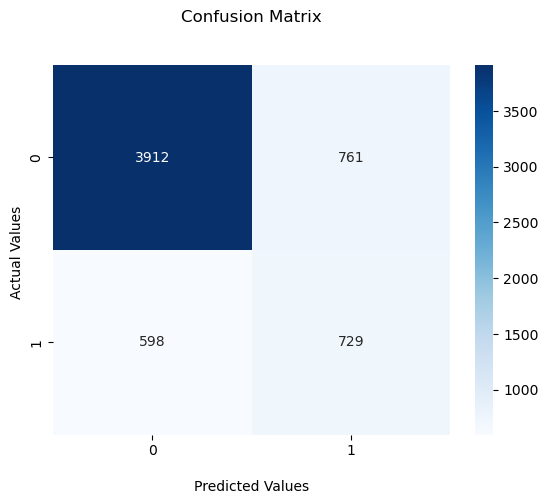

In [74]:
y_pred_prob = model.predict(X_test_transform)
max_tresh = max_treshold(y_pred_prob,  y_test)
y_pred = (y_pred_prob > max_tresh).astype(int)
metrics_df = result_summary("Neural Network", y_pred, metrics_df, y_test)

## SUMMARY

In [75]:
metrics_df.style.hide(axis="index")

Classifier,Class,Precision,Recall,F1-score
LogisticRegression BASIC,0,0.818691,0.969185,0.887604
LogisticRegression BASIC,1,0.692308,0.244160,0.361003
LogisticRegression BASIC,weighted avg,0.790739,0.808833,0.771137
LogisticRegression,0,0.875126,0.745346,0.805039
LogisticRegression,1,0.410891,0.625471,0.495967
LogisticRegression,weighted avg,0.772452,0.718833,0.736682
SVM BASIC,0,0.831292,0.958485,0.890369
SVM BASIC,1,0.683007,0.314996,0.431150
SVM BASIC,weighted avg,0.798496,0.816167,0.788805
SVM,0,0.872636,0.819602,0.845288


#### The best Recall value (for class 1) was achieved by the LogisticRegression model 0.625, unfortunately this was achieved by sacrificing precision. If we compare it with Logistic Regression Basic model we can see that better weighted avg F1-score was achieved for Basic model, but only 24% Frauds were detected (class1) with very high precision 0.69 (if model predict someone to be defaulter, it was true in 69% cases). Due to better parameters optimization and gridsearch recall for class 1 was increased from basic 0.244 to 0.625 (precision was decreased from 0.692 to 0.41). 
#### SVM Basic model achieved better recall values with similar precision and after optimization and GridSearch achieved slightly worse precision for class1 0.578 but better precision than tuned Logistic regression. Weighted avg F1 for tuned SVM as better 0.773 than previous classifier 0.736
#### Interesting  effect is observed with KNN - this classifier had better recall 0.38 for class1 and worse precision 0.543 (basic model) then previous, but after tuning recall dropped down to 0.357 and precision increased to 0.649, so the tuning didn't help to detect more frauds. However weighted avg F1 has the highest value 0.793 among already analysed classifiers. 
#### Random Forest tuning gives us very high recall value 0.59 with decent precision 0.494 better than SVM. If we compare Random forest with the basic version we can see a slight drop of weighted avg F1 score but increase of overall fraud detection from 35% to 59% (see recall for class 1). 
#### Tuned XGBoost gives us similar recall values 0.622 like the best Logistic regression classifier but with much higher precision 0.479 instead of 0.41. Also weighted avg F1 is close to best classifiers results. XGBoost improvement of recall compared with the Basic model is also very good from 0.357 to 0.622 (74%  increase) with cost of lowering precision to value 0.479 (basic 0.629).
#### Neural Network received similar values on raw data compared with feature engineering & SMOTE with even slightly better for raw data. Looks like the algorithm is looking for  dependencies in the data and artificial increase of feature doesn't help much in the process. 
#### At this point, it would be necessary to consider what consequences are associated with not detecting fraud or classifying non defaulters as persons that commit fraud. Algorithms can be pushed to achieve maximum Recall for class 1 but the precision will suffer and banks will also lose money that could earn on those customers that do not commit fraud. 
#### If we assume that costs of not detecting fraud are much higher than tuned XGBoost seems to be the best solution with recall 0,622 and precision 0.479 and weighted avg F1 at 0.776.


## Next steps
#### To be able to optimize selection of model and model tuning itself, it would be necessary to determine the consequences of not detecting fraud or qualifying as a False Positive, and based on that information, a decision could be made.
#### Providing more data from fraud operations (category 1) would help to better balance the data and better model training.